<a href="https://colab.research.google.com/github/CodeWithSridhar/Innomatics-Internship/blob/main/Task12_Missing_values_outliers_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Missing values + outliers - Detection and Treatment + MORE 😁

 **Dataset - adult.csv** 
( https://drive.google.com/file/d/1GtwjrZpP6jiZWXyYShiMHBamUstFgaEF/view?usp=sharing )

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/CodeWithSridhar/Innomatics-Internship/main/adult.csv")

In [3]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
data.shape

(48842, 15)

In [6]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [7]:
data.describe().reset_index().T

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
age,48842,38.6436,13.7105,17,28,37,48,90
fnlwgt,48842,189664,105604,12285,117550,178144,237642,1.4904e+06
educational-num,48842,10.0781,2.57097,1,9,10,12,16
capital-gain,48842,1079.07,7452.02,0,0,0,0,99999
capital-loss,48842,87.5023,403.005,0,0,0,0,4356
hours-per-week,48842,40.4224,12.3914,1,40,40,45,99


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [9]:
data.isnull()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Age Analysis

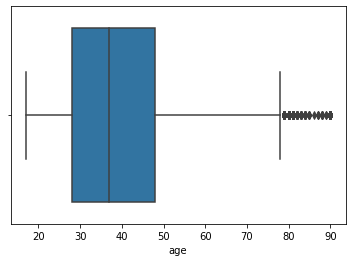

In [11]:
sns.boxplot(data['age'])

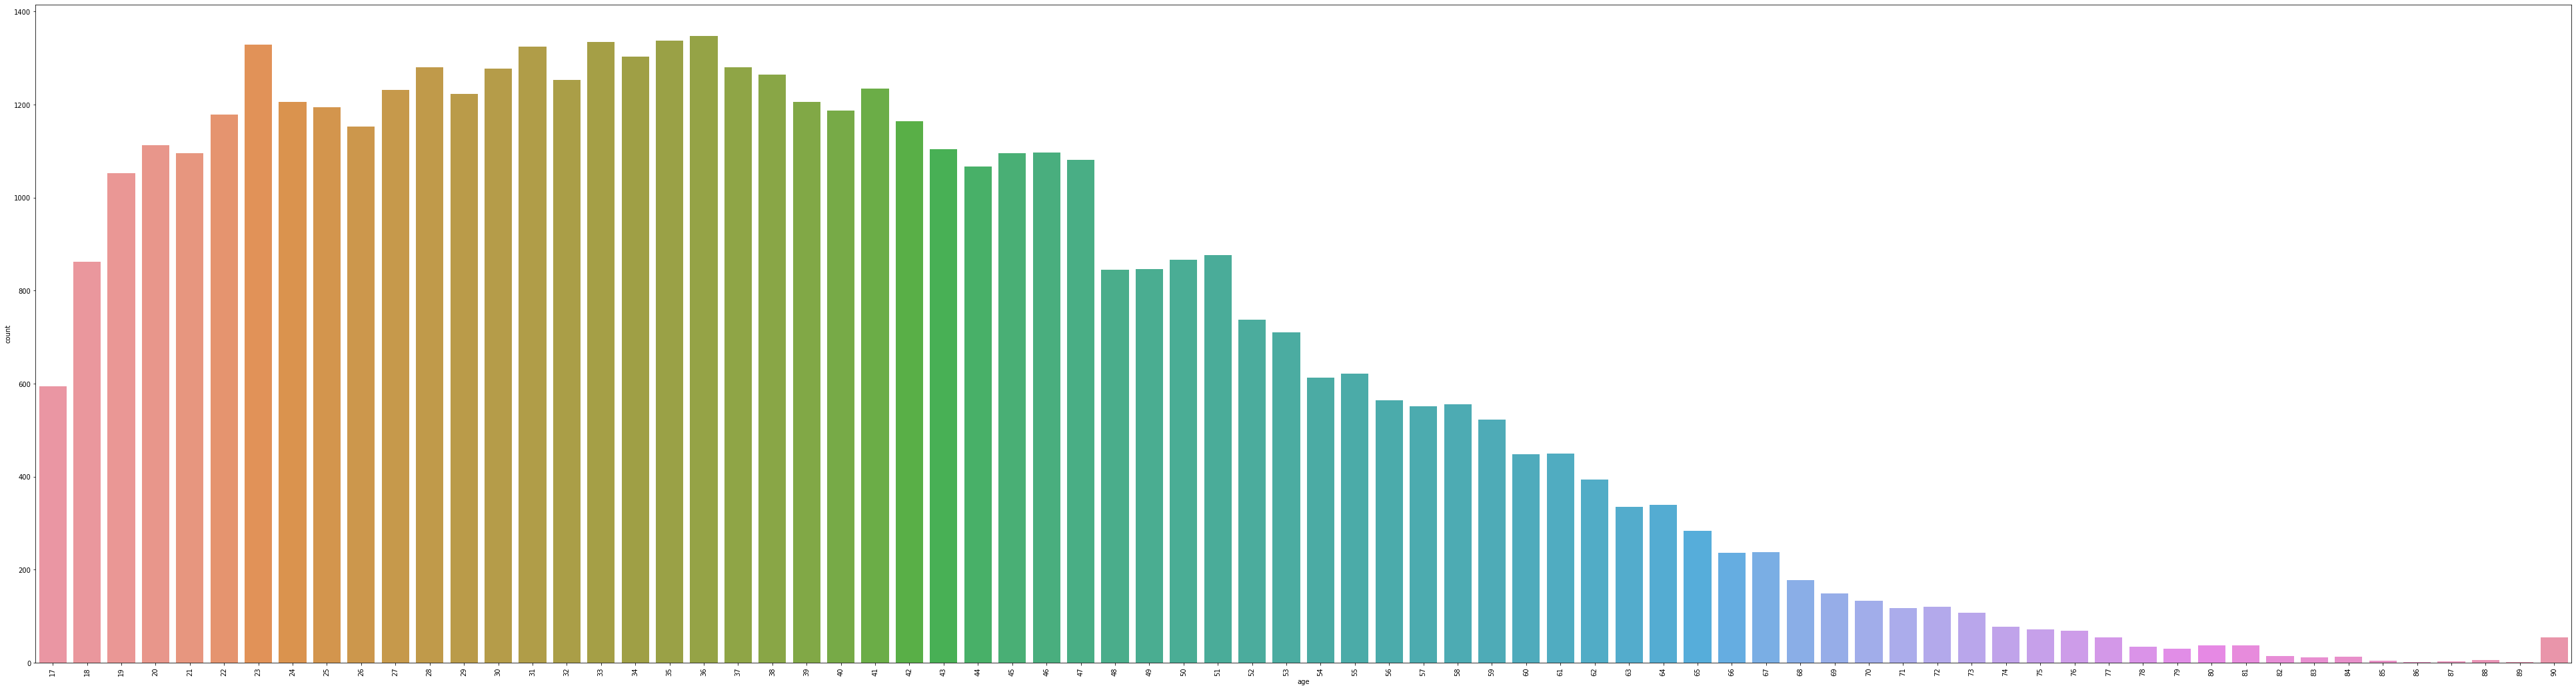

In [12]:
Fig = plt.figure(figsize = (150,40))
A1 = Fig.add_subplot(222)
A = sns.countplot(data['age'] , ax = A1)
for item in A.get_xticklabels():
    item.set_rotation(90)
plt.show()

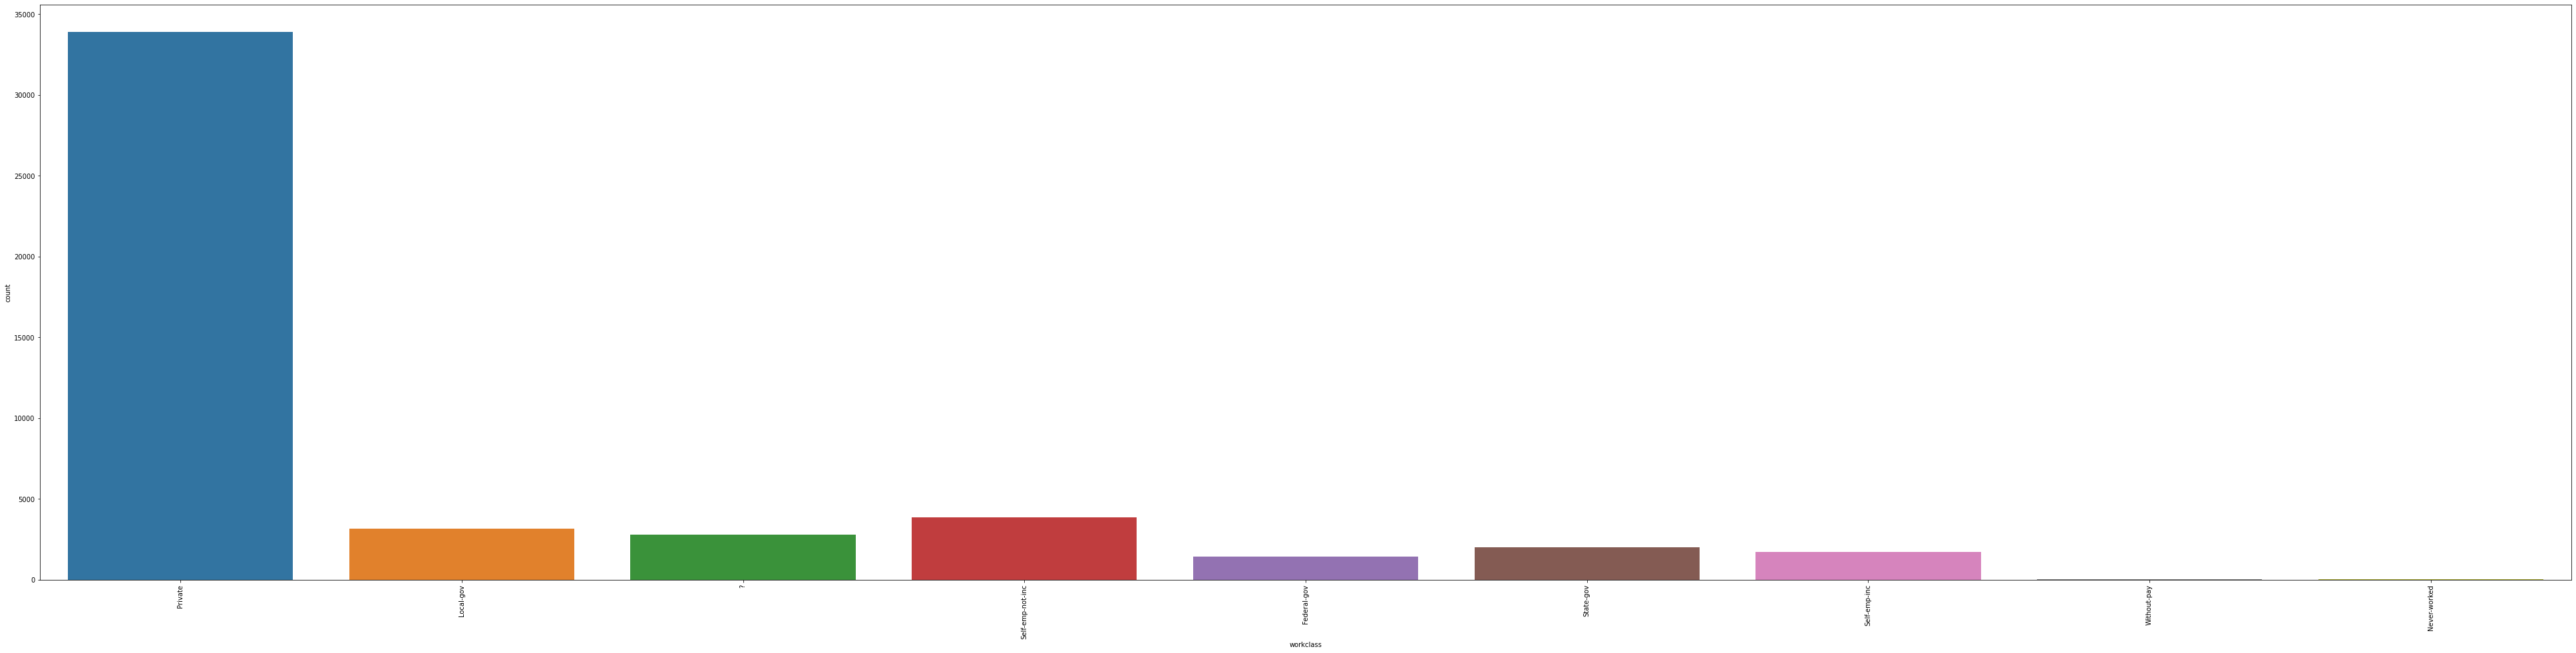

In [13]:
# workclass
Fig = plt.figure(figsize = (150, 35))
A2 = Fig.add_subplot(222)
B = sns.countplot(data['workclass'] , ax = A2)
for item in B.get_xticklabels():
    item.set_rotation(90)    
plt.show()

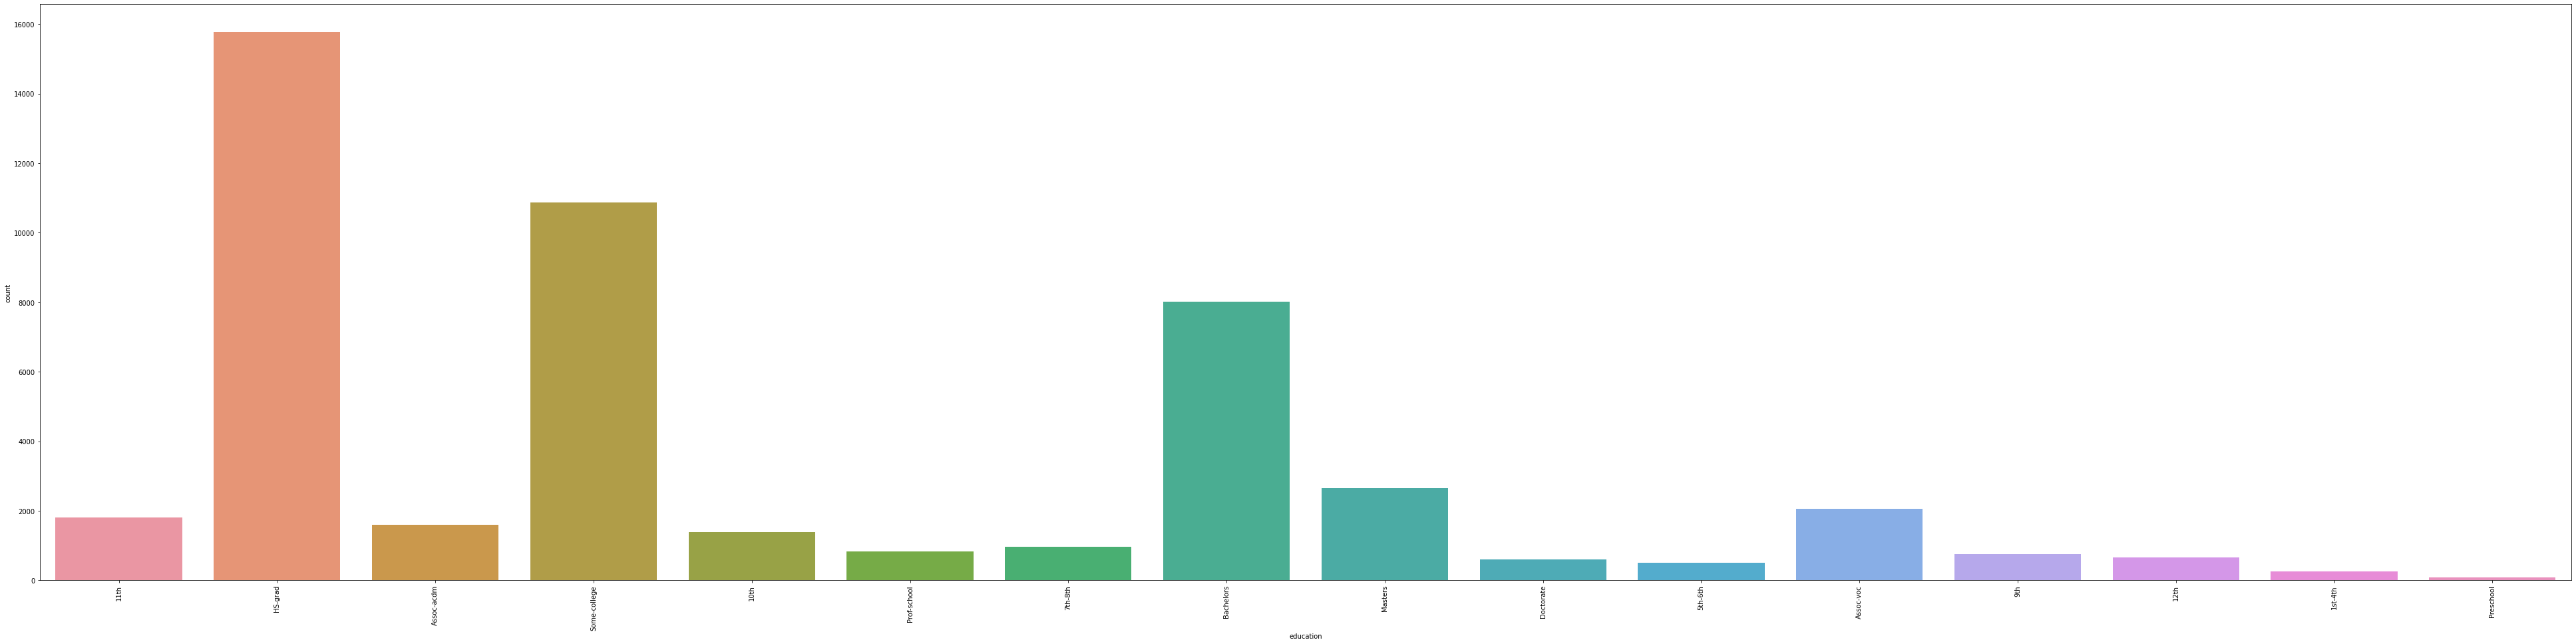

In [14]:
# Education

Fig = plt.figure(figsize = (150, 35))
A3 = Fig.add_subplot(222)
C = sns.countplot(data['education'] , ax = A3)
for item in C.get_xticklabels():
    item.set_rotation(90)    
plt.show()

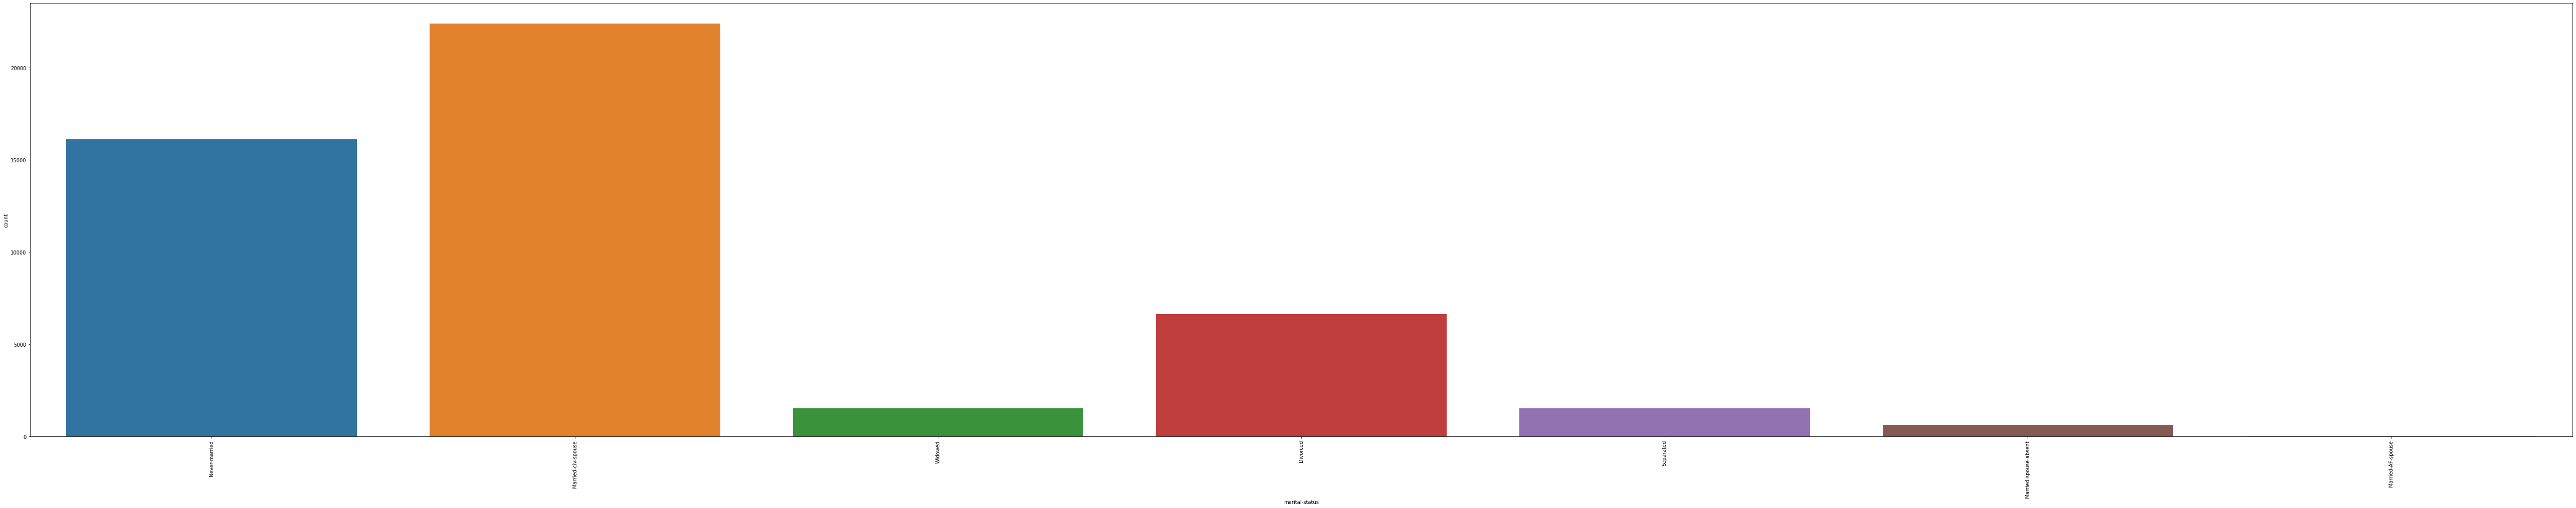

In [15]:
# Marital Status
Fig = plt.figure(figsize = (200, 35))
A5 = Fig.add_subplot(222)
E = sns.countplot(data['marital-status'] , ax = A5)
for item in E.get_xticklabels():
    item.set_rotation(90)    
plt.show()

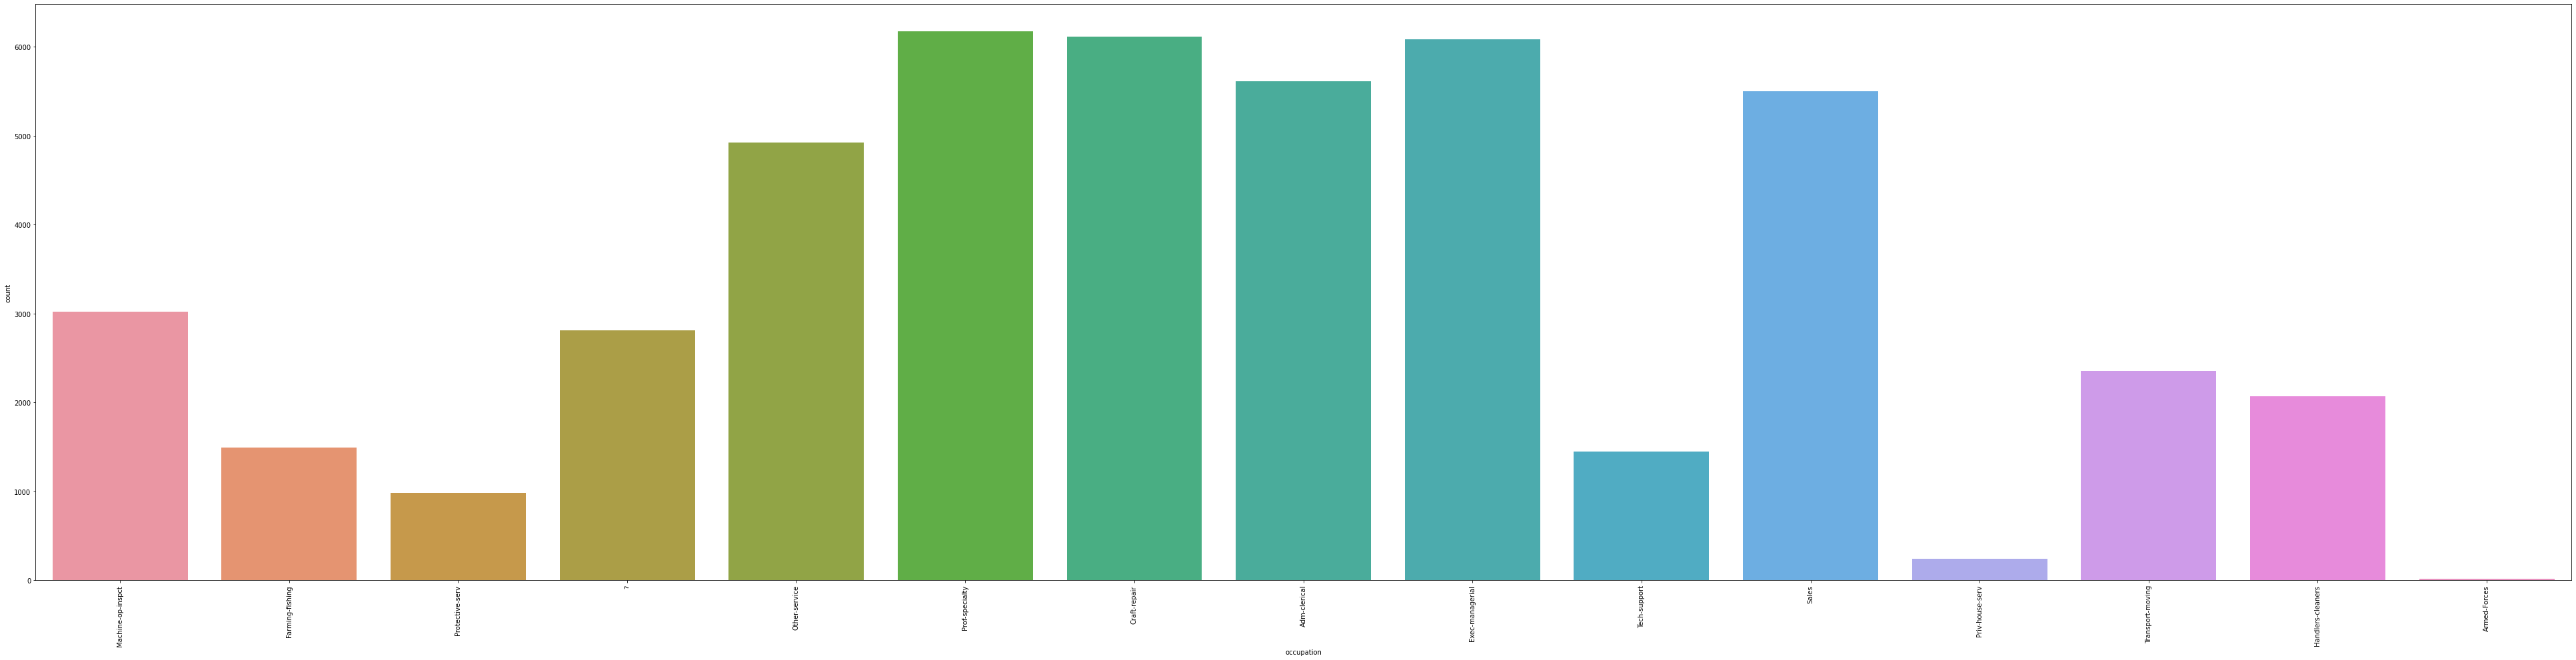

In [16]:
# Occupation
Fig = plt.figure(figsize = (150, 35))
A6 = Fig.add_subplot(222)
F = sns.countplot(data['occupation'] , ax = A6)
for item in F.get_xticklabels():
    item.set_rotation(90)    
plt.show()


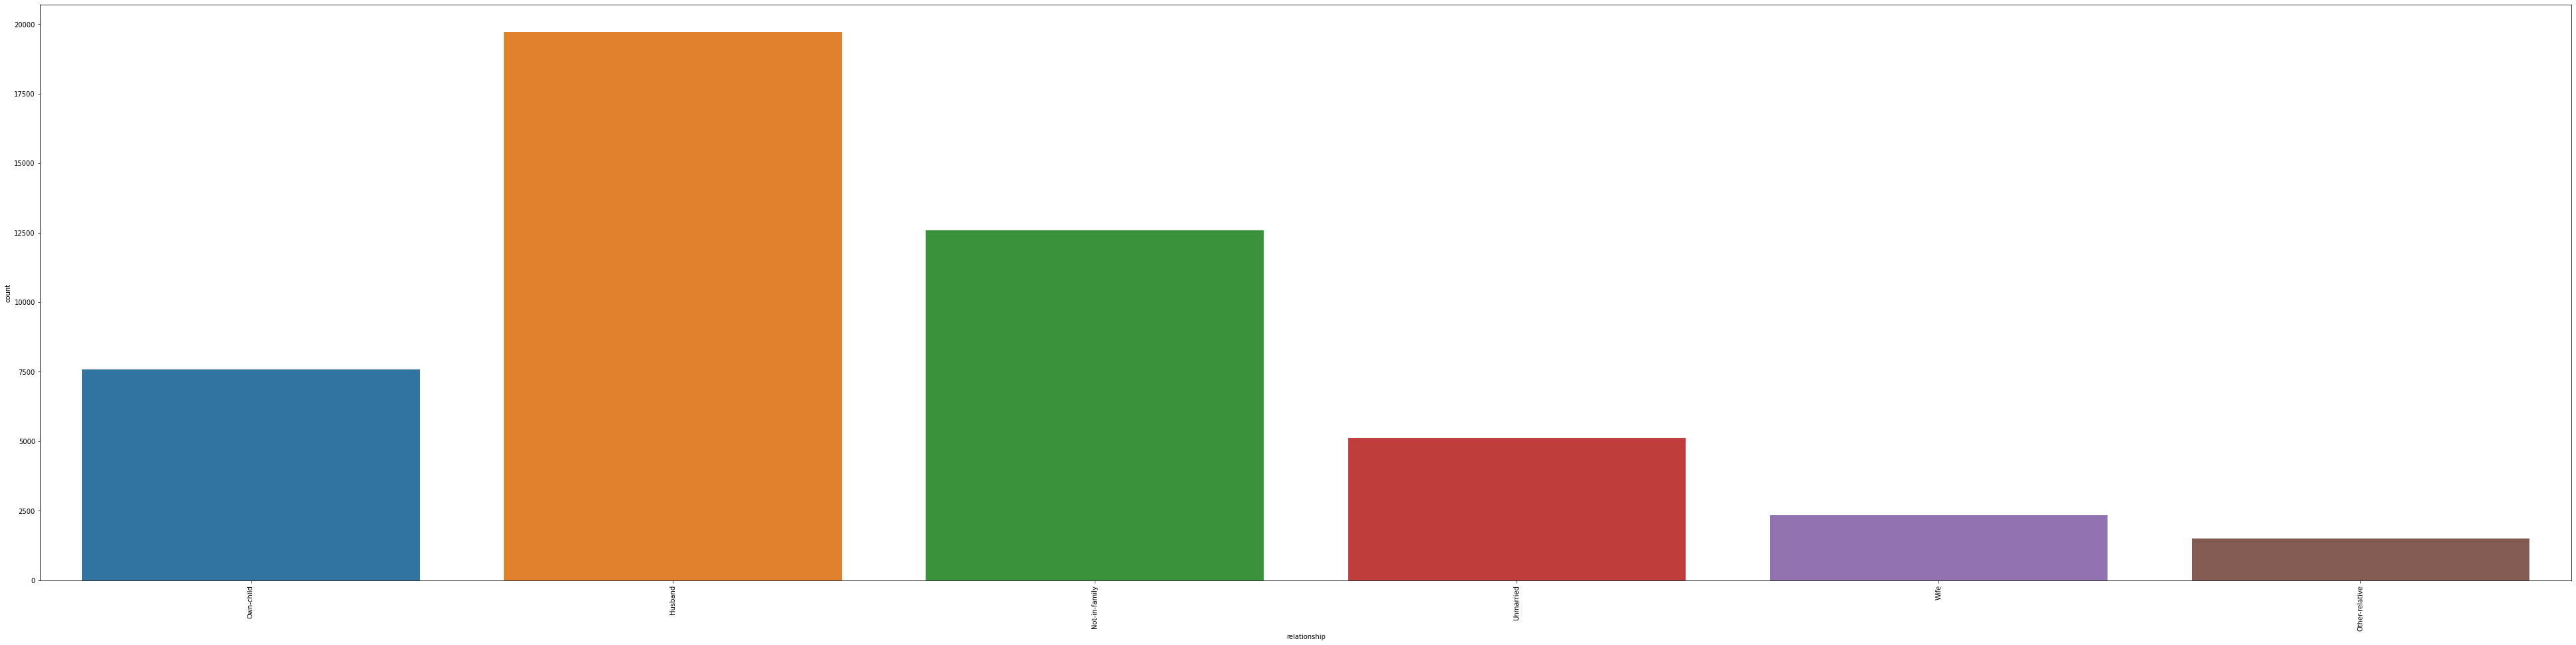

In [17]:
# Relationship
Fig = plt.figure(figsize = (150, 35))
A7 = Fig.add_subplot(222)
G = sns.countplot(data['relationship'] , ax = A7)
for item in G.get_xticklabels():
    item.set_rotation(90)    
plt.show()

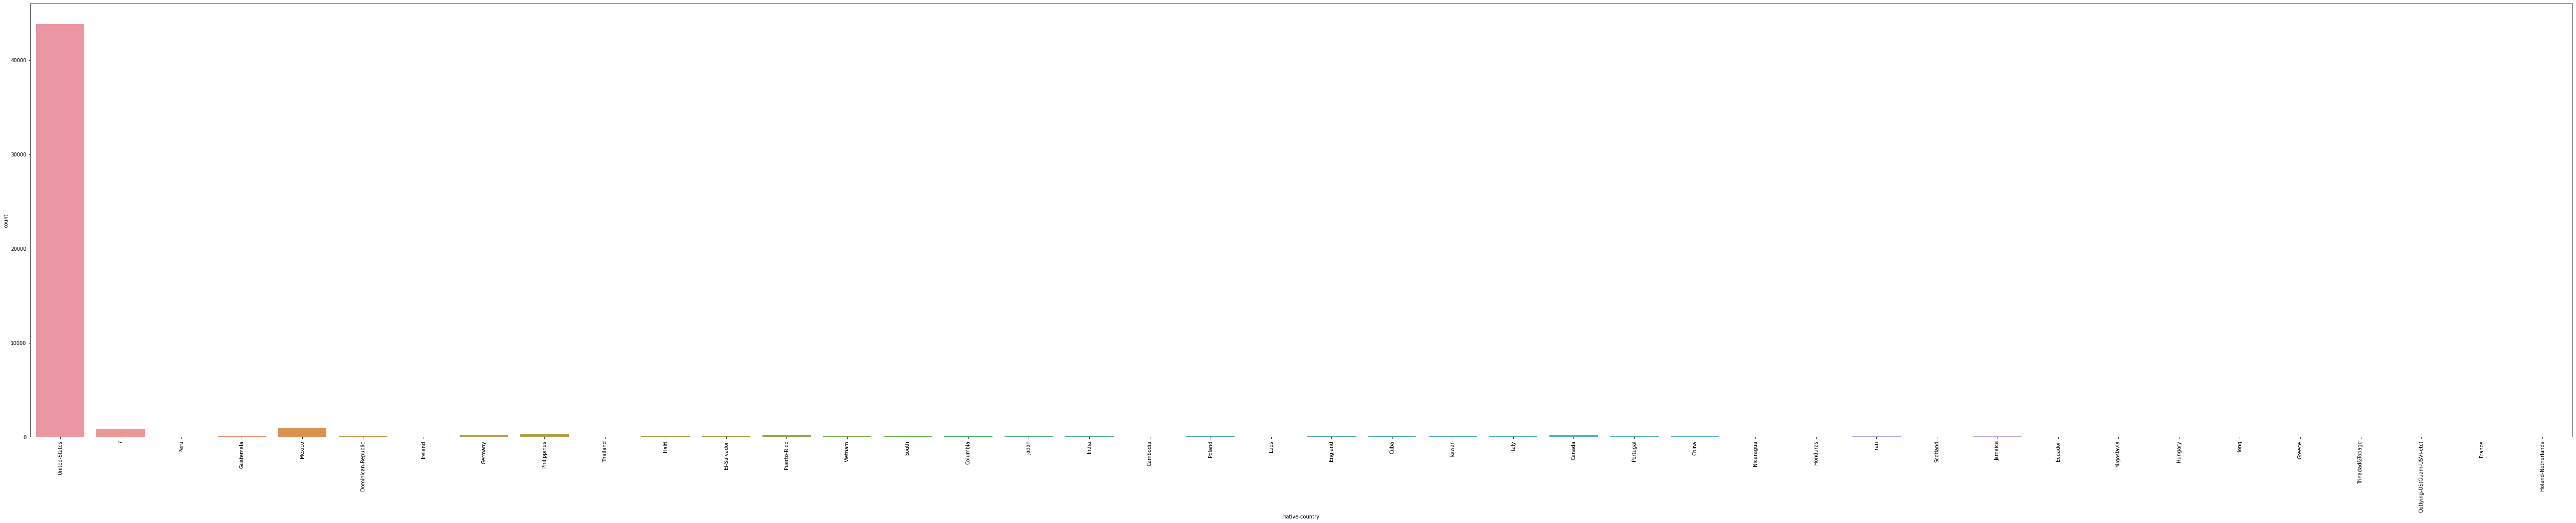

In [18]:
# Native Country
Fig = plt.figure(figsize = (200, 35))
A8 = Fig.add_subplot(222)
H = sns.countplot(data['native-country'] , ax = A8)
for item in H.get_xticklabels():
    item.set_rotation(90)    
plt.show()

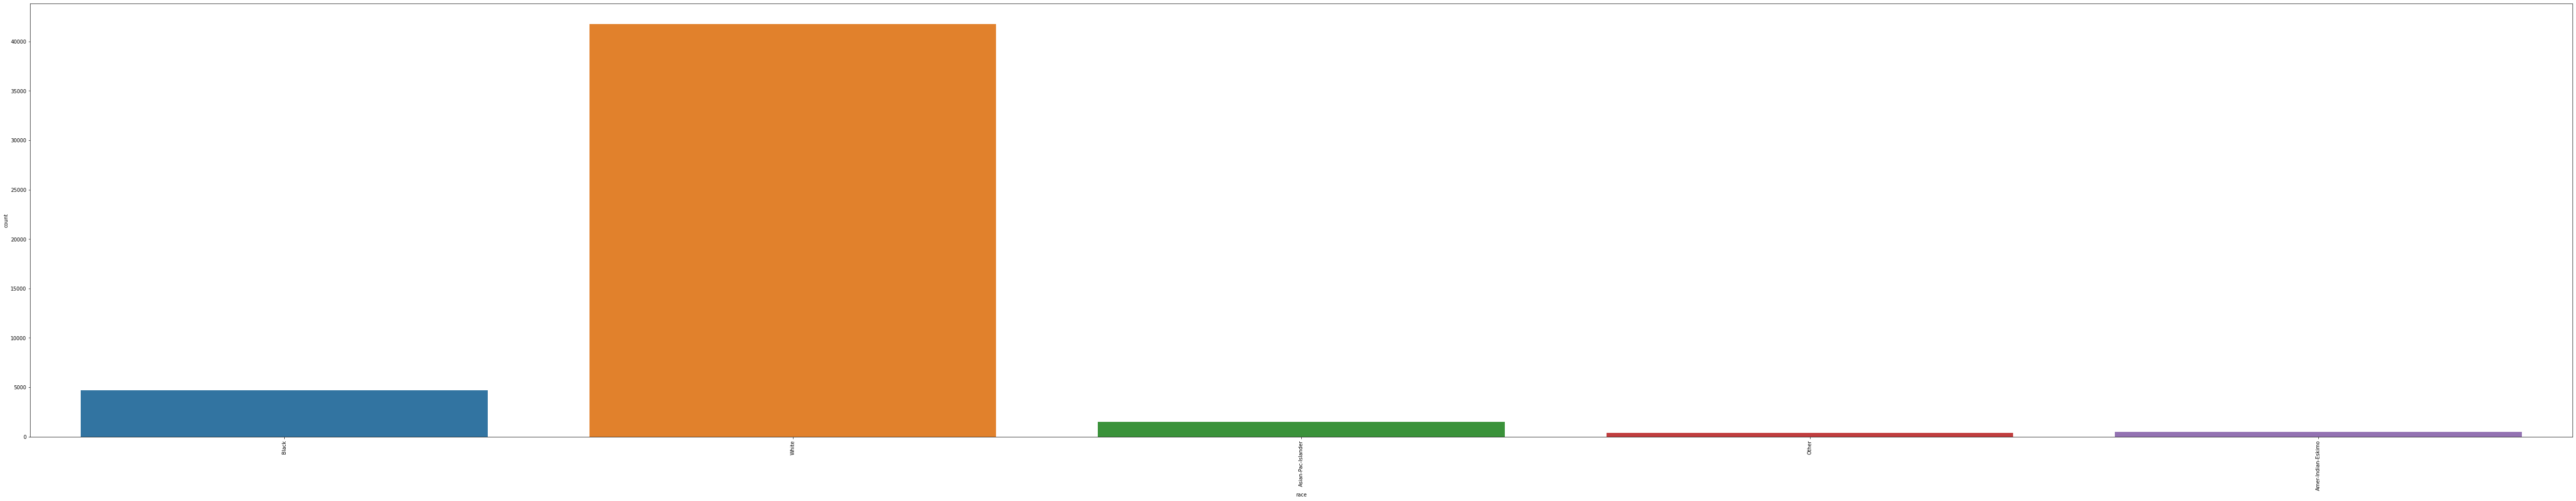

In [19]:
# Race

Fig = plt.figure(figsize = (200, 35))
A9 = Fig.add_subplot(222)
I = sns.countplot(data['race'] , ax = A9)
for item in I.get_xticklabels():
    item.set_rotation(90)    
plt.show()



# Checking Correlation

In [20]:
data.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


# Heatmap

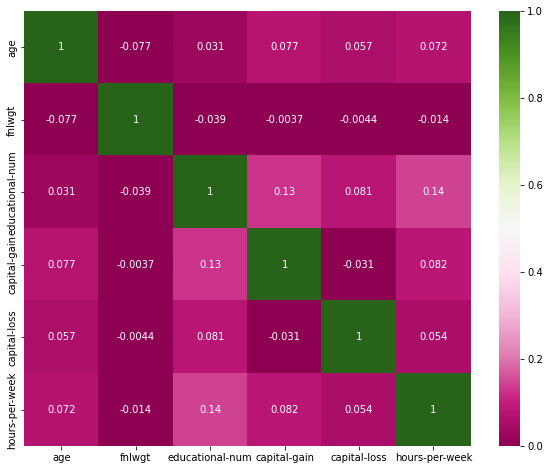

In [21]:
plt.figure(figsize = (10,8))  
sns.heatmap(data.corr(),vmin = 0, vmax = 1, cmap = 'PiYG', annot=True)
plt.show()

# Bivariate Analysis

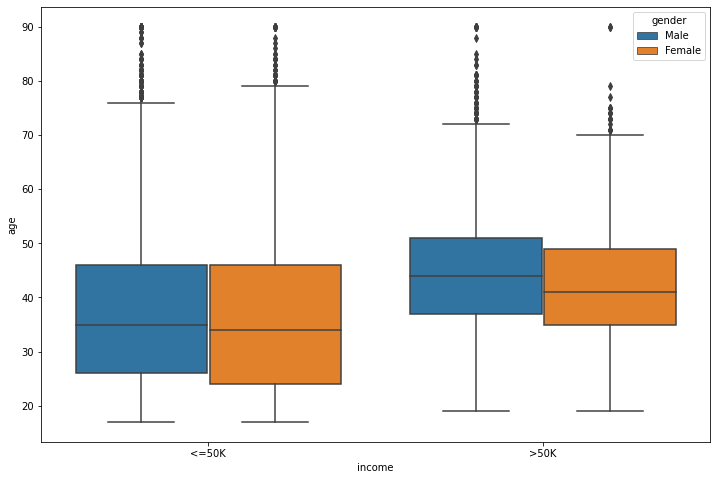

In [22]:
# Income and Age
plt.figure(figsize = (12,8))
sns.boxplot(x = "income", y = "age", data = data, hue = 'gender')

Income and Gender

<Figure size 864x504 with 0 Axes>

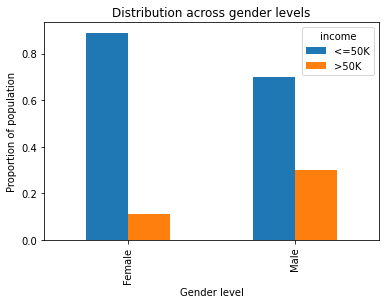

In [23]:
plt.figure(figsize=(12,7))
gender = round(pd.crosstab(data.gender, data.income).div(pd.crosstab(data.gender, data.income).apply(sum,1),0),2)
gender.sort_values(by = '>50K', inplace = True)
ax = gender.plot(kind ='bar', title = 'Distribution across gender levels')
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')
plt.show()

Income and Workclass

Text(17.200000000000003, 0.5, 'Proportion of population')

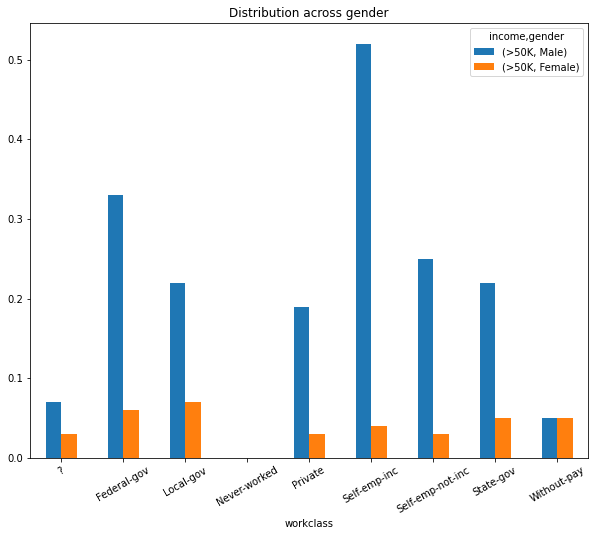

In [24]:
gender_workclass = round(pd.crosstab(data.workclass, [data.income, data.gender]).div(pd.crosstab(data.workclass, [data.income, data.gender]).apply(sum,1),0),2)
gender_workclass[[('>50K','Male'), ('>50K','Female')]].plot(kind = 'bar', title = 'Distribution across gender', figsize = (10,8), rot = 30)
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')

In [25]:
print(data['native-country'].value_counts())
not_from_US = np.sum(data['native-country']!= 'United-States')
print('\n')
print(not_from_US, 'people not from the United States. ')

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                        

In [26]:
data['native-country'] = (data['native-country']=='United-States')*1

In [27]:
data.select_dtypes(exclude=[np.number]).head()

,workclass,education,marital-status,occupation,relationship,race,gender,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,>50K
4,?,Some-college,Never-married,?,Own-child,White,Female,<=50K


In [28]:
data = data.applymap(lambda x: np.nan if x=='?' else x)

In [29]:
data.isnull().sum(axis=0)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country        0
income                0
dtype: int64

In [30]:
data.shape[0] - data.dropna(axis=0).shape[0]

2809

In [31]:
data = data.dropna(axis=0)

In [32]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,1,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,1,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,1,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,1,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,1,<=50K


In [33]:
data = pd.get_dummies(data,columns = ['workclass','marital-status','occupation',
                                      'relationship','race','gender'], prefix = ['workclass', 'is', 'is', 'race_is', 'relation', 'is'], drop_first=True)

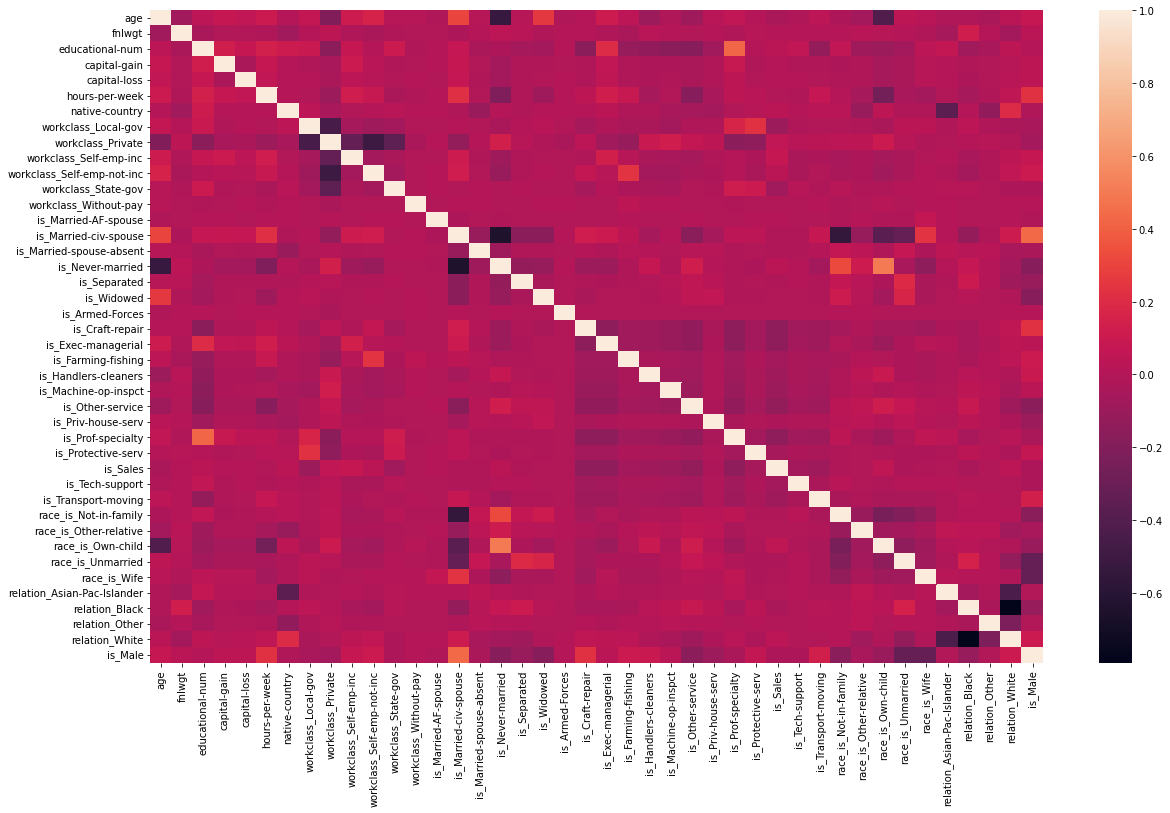

In [34]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr())

## Model Prepration

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier as xgb
from sklearn import metrics

In [37]:
y = data.income
X = data.drop(['income', 'education', 'native-country', 'fnlwgt'],axis=1)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

Random Forest

In [41]:
rfmodel = RandomForestClassifier(n_estimators=300,oob_score=True,min_samples_split=5, max_depth=10,random_state=10)
rfmodel.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=True, random_state=10, verbose=0,
                       warm_start=False)

In [42]:
def show_classifier_metrics(clf, y_train=y_train,y_test=y_test, print_classification_report=True, print_confusion_matrix=True):
    print(clf)
    if print_confusion_matrix:
        print('Confusion matrix of training data : ')
        print(metrics.confusion_matrix(y_train, clf.predict(X_train)))
        print('Confusion matrix of test data : ')
        print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
    if print_classification_report:
        print('Classification report of test data : ')
        print(metrics.classification_report(y_test, clf.predict(X_test)))

In [43]:
show_classifier_metrics(rfmodel,y_train)
print('oob score = ', rfmodel.oob_score_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=True, random_state=10, verbose=0,
                       warm_start=False)
Confusion matrix of training data : 
[[26573  1176]
 [ 3855  5222]]
Confusion matrix of test data : 
[[6531  331]
 [1008 1337]]
Classification report of test data : 
              precision    recall  f1-score   support

       <=50K       0.87      0.95      0.91      6862
        >50K       0.80      0.57      0.67      2345

    accuracy                           0.85      9207
   macro avg       0.83      0.76      0.79      9207
weighted avg       0

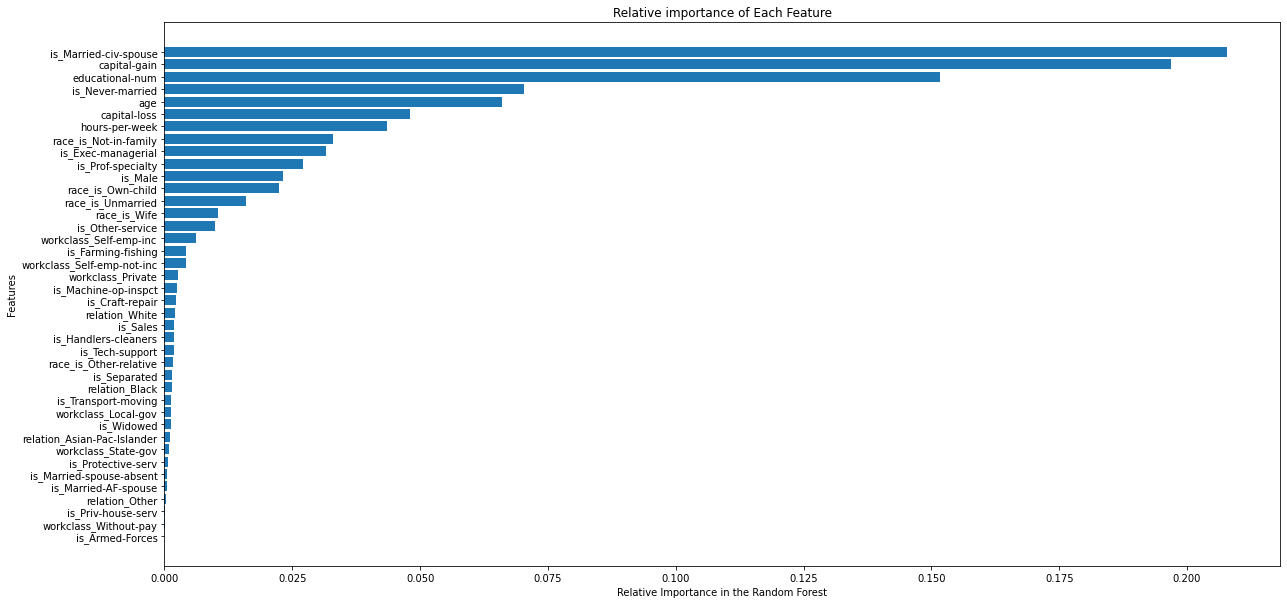

In [44]:
importance_list = rfmodel.feature_importances_
name_list = X_train.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.figure(figsize=(20,10))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()